In [1]:
import os

import pandas as pd
import numpy as np
from tqdm import tqdm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../../hetnet-ml/src')
import graph_tools as gt
import plot_tools as pt

DATA_DIR = '../../data'

paper_figs = os.path.join(DATA_DIR, 'figures/paper_figs')
supp_figs = os.path.join(DATA_DIR, 'figures/supp_figs')
other_figs = os.path.join(DATA_DIR, 'figures/other_figs')

In [2]:
standard_dir = os.path.join(DATA_DIR, 'time_networks-6_metanode/1985/alpha_0.1/10x_pos-neg',
                                       '0_year_diff/recall-scoring/2_pmids/dwpc_w_0.6/')

standard_result = pd.read_csv(os.path.join(standard_dir, 'predictions.csv'))
standard_result.head(2)

,cd_id,cd_name,do_id,do_name,status,approval_year,year_diff,year_cat,dataset,test_probas,all_probas,cd_percentile,do_percentile
0,D017706,Lisinopril,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,unused,NaN,0.027761,0.573228,0.001119
1,D016293,Moricizine,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,unused,NaN,0.027999,0.568504,0.002237


In [3]:
# Read edge file to get all the edges...
edges = gt.remove_colons(pd.read_csv(os.path.join(standard_dir, 'edges_neo4j.csv')))['type'].value_counts().index

# Set variables for read data
base_dir = os.path.join(DATA_DIR, 'edge_time_differences/1985/')
from_years = [i for i in range(1950, 2025, 5)]
test_res = []

for et in tqdm(edges):
    for from_year in from_years:

        # Read results
        result_file = os.path.join(base_dir, et, 'from_year_{}'.format(from_year), '2_pmids/predictions.csv')
        res = pd.read_csv(result_file)

        # Add metadata columns
        res['test_edge'] = et
        res['test_year'] = from_year
        
        # Get a test set version of data
        test_res.append(res.query('dataset == "test"').copy())
test_res = pd.concat(test_res)

100%|██████████| 30/30 [08:02<00:00, 16.10s/it]


In [4]:
test_res.head(2)

,cd_id,cd_name,do_id,do_name,status,approval_year,year_diff,year_cat,dataset,test_probas,all_probas,cd_percentile,do_percentile,test_edge,test_year
24,D004205,Cromolyn Sodium,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,test,0.031211,0.031211,0.451969,0.027964,LOCATION_OF_AloCD,1950
92,C021092,stiripentol,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,test,0.032427,0.032427,0.577953,0.104027,LOCATION_OF_AloCD,1950


In [5]:
from scipy import interp                                                             
from sklearn.metrics import precision_recall_curve, roc_curve, auc        

def calc_roc(df):
    fpr, tpr, thresholds = roc_curve(df['status'], df['all_probas'])                                  
    roc_auc = auc(fpr, tpr)                                                      
    return roc_auc
    
def calc_prc(df):
    pre, rec, thresholds = precision_recall_curve(df['status'], df['all_probas'])                                  
    roc_prc = auc(rec, pre)                                                      
    return roc_prc

In [6]:
standard_result

,cd_id,cd_name,do_id,do_name,status,approval_year,year_diff,year_cat,dataset,test_probas,all_probas,cd_percentile,do_percentile
0,D017706,Lisinopril,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,unused,NaN,0.027761,0.573228,0.001119
1,D016293,Moricizine,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,unused,NaN,0.027999,0.568504,0.002237
2,D016712,Mupirocin,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,unused,NaN,0.028170,0.724409,0.003356
3,D000068759,Formoterol Fumarate,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,unused,NaN,0.028358,0.788976,0.004474
4,D000068818,Cetuximab,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,unused,NaN,0.028412,0.770079,0.005593
5,C005435,phenylmethylpyrazolone,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,unused,NaN,0.028489,0.725984,0.006711
6,C041359,terbinafine,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,unused,NaN,0.028533,0.655118,0.007830
7,C040656,loxoprofen,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,unused,NaN,0.028537,0.946457,0.008949
8,D019782,Riluzole,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,unused,NaN,0.028547,0.960630,0.010067
9,C043345,emedastine,C0001263,Abdominal actinomycosis,0,NaN,NaN,NaN,unused,NaN,0.028570,0.894488,0.011186


In [7]:
calc_roc(standard_result.query('dataset == "test"'))

0.7979311685338772

In [8]:
from collections import defaultdict

In [9]:
roc_result = defaultdict(list)

orig_roc = calc_roc(standard_result.query('dataset == "test"'))
orig_prc = calc_prc(standard_result.query('dataset == "test"'))

for grp, frame in test_res.groupby(['test_edge', 'test_year']):
    roc = calc_roc(frame)
    prc = calc_prc(frame)
    
    roc_result['test_edge'].append(grp[0])
    roc_result['test_year'].append(grp[1])
    roc_result['auroc'].append(roc)
    roc_result['auprc'].append(prc)
    
roc_result = pd.DataFrame(roc_result).sort_values(['test_edge', 'test_year'])

In [10]:
roc_result

,auprc,auroc,test_edge,test_year
0,0.443101,0.796910,AFFECTS_CDafA,1950
1,0.440877,0.800343,AFFECTS_CDafA,1955
2,0.436236,0.797469,AFFECTS_CDafA,1960
3,0.437929,0.801255,AFFECTS_CDafA,1965
4,0.436110,0.796723,AFFECTS_CDafA,1970
5,0.437291,0.794265,AFFECTS_CDafA,1975
6,0.439175,0.793797,AFFECTS_CDafA,1980
7,0.447317,0.797934,AFFECTS_CDafA,1985
8,0.447152,0.799353,AFFECTS_CDafA,1990
9,0.444918,0.796372,AFFECTS_CDafA,1995


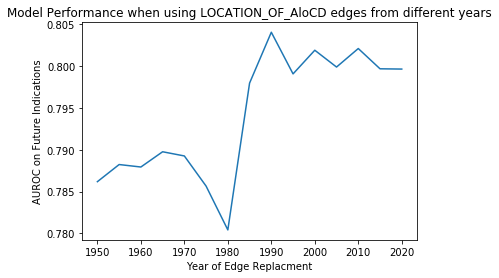

In [11]:
test_edge = edges[0]

roc_result.query('test_edge == @test_edge').set_index('test_year')['auroc'].plot()
plt.xlabel('Year of Edge Replacment')
plt.ylabel('AUROC on Future Indications')
plt.title('Model Performance when using {} edges from different years'.format(test_edge));

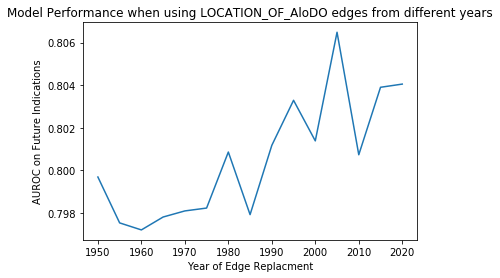

In [12]:
test_edge = edges[1]

roc_result.query('test_edge == @test_edge').set_index('test_year')['auroc'].plot()
plt.xlabel('Year of Edge Replacment')
plt.ylabel('AUROC on Future Indications')
plt.title('Model Performance when using {} edges from different years'.format(test_edge));

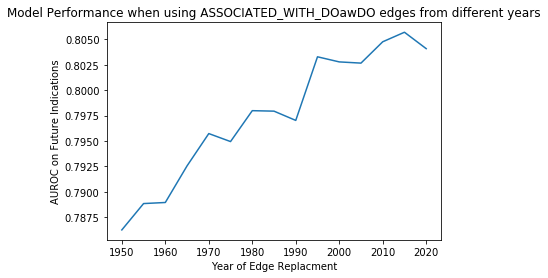

In [13]:
test_edge = edges[2]

roc_result.query('test_edge == @test_edge').set_index('test_year')['auroc'].plot()
plt.xlabel('Year of Edge Replacment')
plt.ylabel('AUROC on Future Indications')
plt.title('Model Performance when using {} edges from different years'.format(test_edge));

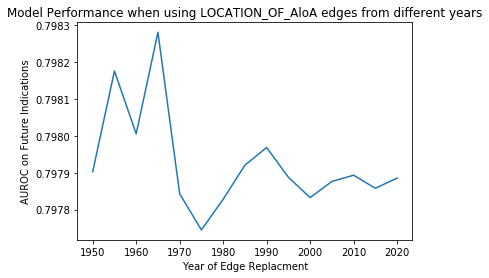

In [14]:
test_edge = edges[3]

roc_result.query('test_edge == @test_edge').set_index('test_year')['auroc'].plot()
plt.xlabel('Year of Edge Replacment')
plt.ylabel('AUROC on Future Indications')
plt.title('Model Performance when using {} edges from different years'.format(test_edge));

In [15]:
top_edges = edges[:8]
top_roc = roc_result.query('test_edge in @top_edges')

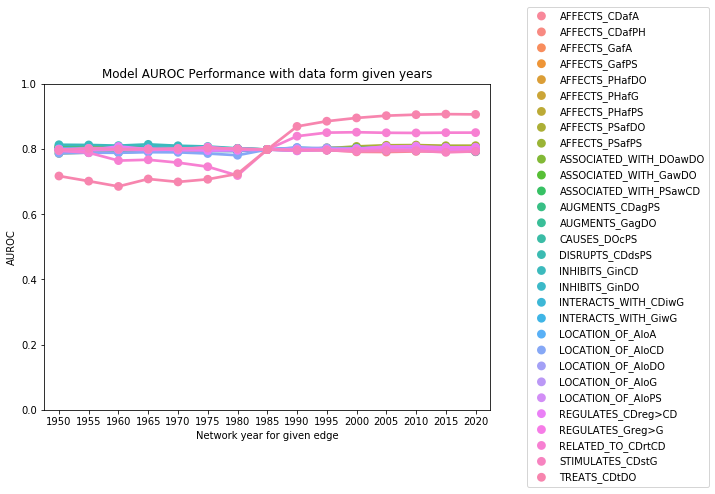

In [16]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='test_year', y='auroc', hue='test_edge', data=roc_result)
plt.xlabel('Network year for given edge')
plt.ylabel('AUROC')
plt.title('Model AUROC Performance with data form given years')
plt.ylim([0, 1])
plt.legend(loc=5, bbox_to_anchor=(1.5, .5));

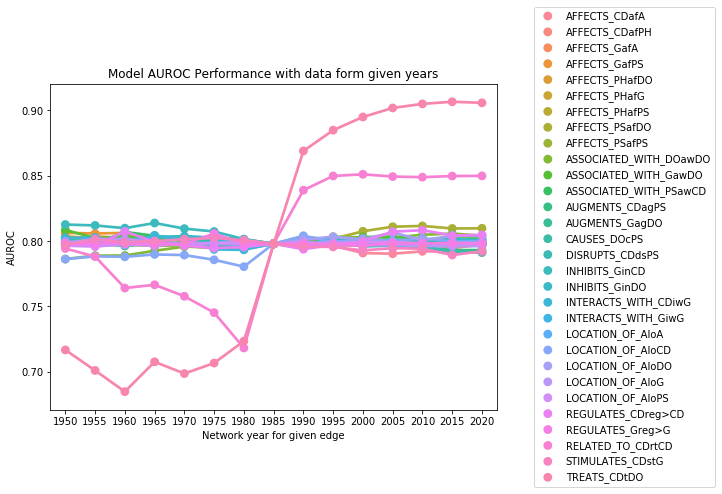

In [17]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='test_year', y='auroc', hue='test_edge', data=roc_result)
plt.xlabel('Network year for given edge')
plt.ylabel('AUROC')
plt.title('Model AUROC Performance with data form given years')
#plt.ylim([0, 1])
plt.legend(loc=5, bbox_to_anchor=(1.5, .5));

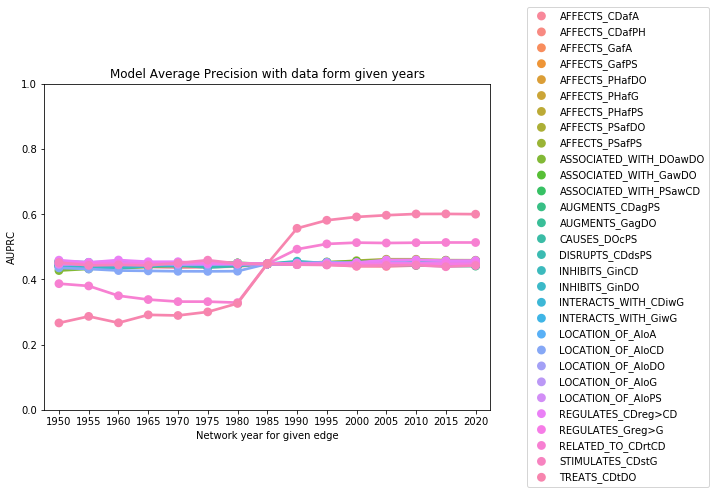

In [18]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='test_year', y='auprc', hue='test_edge', data=roc_result)
plt.xlabel('Network year for given edge')
plt.ylabel('AUPRC')
plt.title('Model Average Precision with data form given years')
plt.ylim([0, 1])
plt.legend(loc=5, bbox_to_anchor=(1.5, .5));

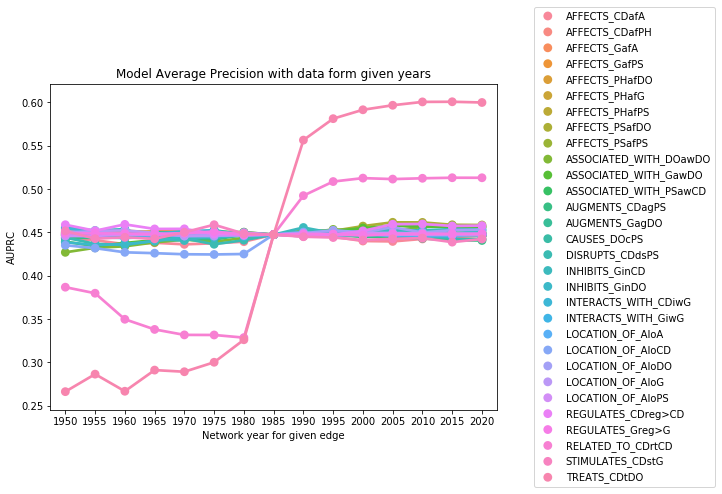

In [19]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='test_year', y='auprc', hue='test_edge', data=roc_result)
plt.xlabel('Network year for given edge')
plt.ylabel('AUPRC')
plt.title('Model Average Precision with data form given years')
#plt.ylim([0, 1])
plt.legend(loc=5, bbox_to_anchor=(1.5, .5));

In [20]:
roc_result.head(2)

,auprc,auroc,test_edge,test_year
0,0.443101,0.796910,AFFECTS_CDafA,1950
1,0.440877,0.800343,AFFECTS_CDafA,1955


In [21]:
change = roc_result.query('test_year == 2020').set_index('test_edge')['auroc'] - roc_result.query('test_year == 1950').set_index('test_edge')['auroc']
change = change.rename('delta_auroc').to_frame()
change['delta_auprc'] =roc_result.query('test_year == 2020').set_index('test_edge')['auprc'] - roc_result.query('test_year == 1950').set_index('test_edge')['auprc']

change['increase_from_1985'] = roc_result.query('test_year == 2020').set_index('test_edge')['auroc'] - roc_result.query('test_year == 1985').set_index('test_edge')['auroc']
change['decrease_from_1985'] = roc_result.query('test_year == 1985').set_index('test_edge')['auroc'] - roc_result.query('test_year == 1950').set_index('test_edge')['auroc']


change = change.reset_index().sort_values('delta_auroc', ascending=False).reset_index(drop=True)
change

,test_edge,delta_auroc,delta_auprc,increase_from_1985,decrease_from_1985
0,TREATS_CDtDO,0.188912,0.333509,0.107764,0.081148
1,RELATED_TO_CDrtCD,0.055561,0.126201,0.051860,0.003701
2,ASSOCIATED_WITH_DOawDO,0.017862,0.029225,0.006159,0.011703
3,LOCATION_OF_AloCD,0.013464,0.011785,0.001679,0.011785
4,AFFECTS_PSafDO,0.011659,0.011554,0.011751,-0.000092
5,REGULATES_CDreg>CD,0.006791,-0.001030,0.006760,0.000031
6,LOCATION_OF_AloDO,0.004365,0.001933,0.006132,-0.001767
7,LOCATION_OF_AloPS,0.001562,0.002716,0.000116,0.001446
8,AFFECTS_PSafPS,0.001499,0.001146,0.000541,0.000958
9,INHIBITS_GinDO,0.001113,0.012950,0.001458,-0.000345


In [22]:
change.sort_values('increase_from_1985', ascending=False)

,test_edge,delta_auroc,delta_auprc,increase_from_1985,decrease_from_1985
0,TREATS_CDtDO,0.188912,0.333509,0.107764,0.081148
1,RELATED_TO_CDrtCD,0.055561,0.126201,0.051860,0.003701
4,AFFECTS_PSafDO,0.011659,0.011554,0.011751,-0.000092
5,REGULATES_CDreg>CD,0.006791,-0.001030,0.006760,0.000031
2,ASSOCIATED_WITH_DOawDO,0.017862,0.029225,0.006159,0.011703
6,LOCATION_OF_AloDO,0.004365,0.001933,0.006132,-0.001767
26,ASSOCIATED_WITH_GawDO,-0.006441,0.017261,0.004196,-0.010636
29,INHIBITS_GinCD,-0.011811,-0.002489,0.002916,-0.014727
17,INTERACTS_WITH_CDiwG,-0.001720,-0.007954,0.002756,-0.004475
15,ASSOCIATED_WITH_PSawCD,-0.001615,-0.001830,0.001744,-0.003359


In [23]:
roc_result = roc_result.merge(change, on='test_edge', how='left')

### Sorterd by best performance increase between 1985 and contemporary

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


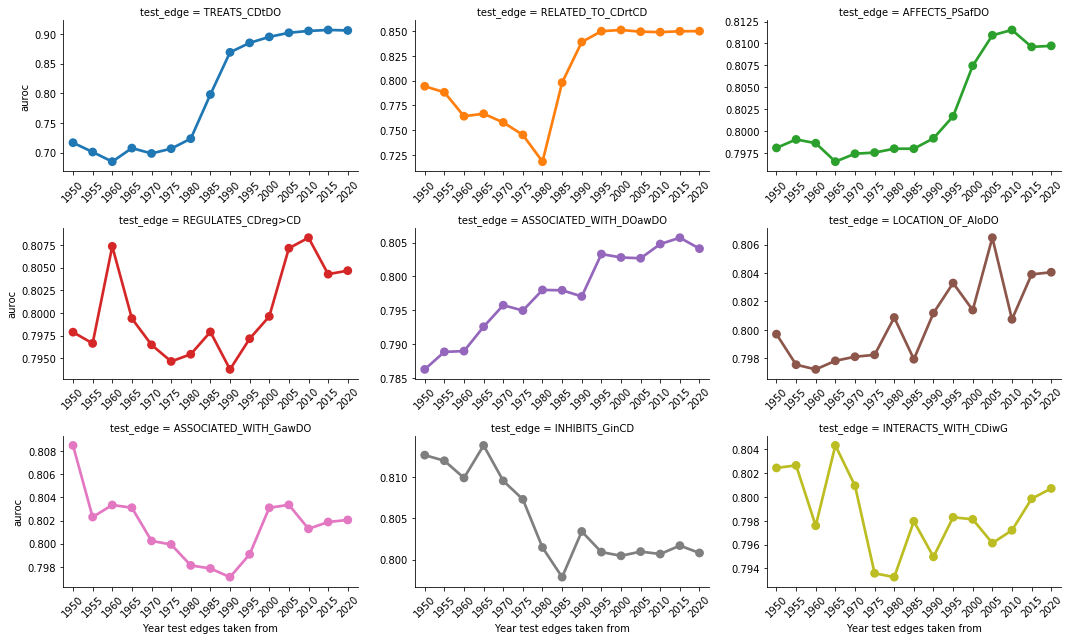

In [24]:
n_row = 3
n_col = 3


to_plot = change.sort_values('increase_from_1985', ascending=False)['test_edge'].values[:(n_row*n_col)]
#markers = ['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V'][:len(to_plot)]

data = roc_result.query('test_edge in @to_plot').sort_values('increase_from_1985', ascending=False)

g = sns.FacetGrid(data, col="test_edge", col_wrap=3, sharex=False, sharey=False, hue='test_edge', hue_order=to_plot)
g.map(sns.pointplot, "test_year", "auroc",  ci=None)
g.fig.set_size_inches(5*n_row, 3*n_col)
g.set_xticklabels(rotation=45)
g.fig.set_tight_layout(True)
g.set_xlabels('Year test edges taken from');

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


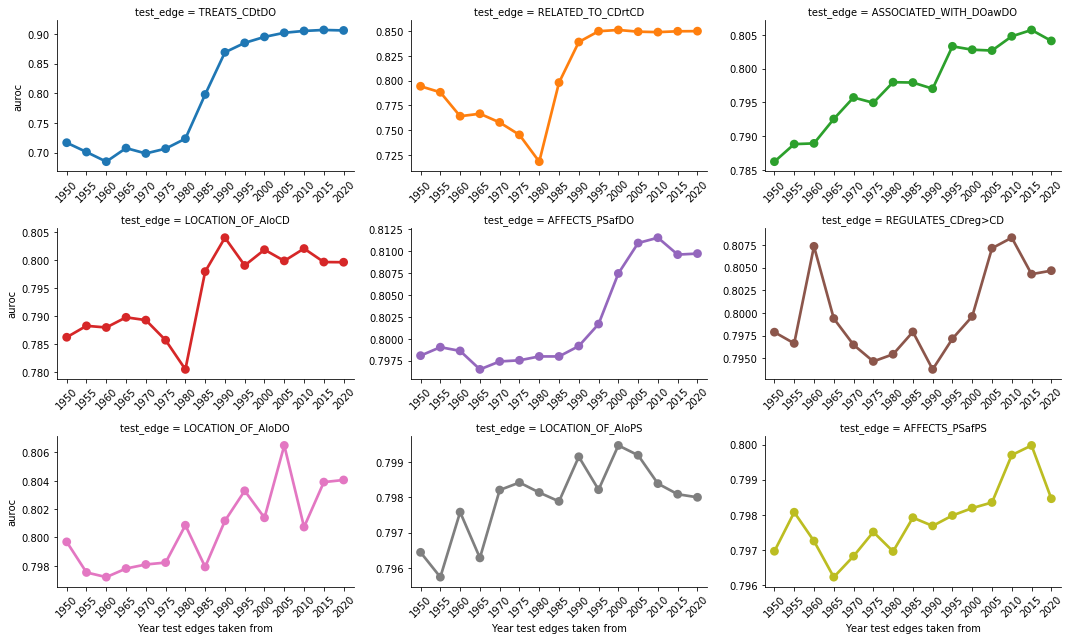

In [25]:
n_row = 3
n_col = 3

to_plot = change['test_edge'].values[:(n_row*n_col)]
data = roc_result.query('test_edge in @to_plot').sort_values(['delta_auroc', 'test_year'], ascending=[False, True])

g = sns.FacetGrid(data, col="test_edge", col_wrap=3, sharex=False, sharey=False, hue='test_edge', hue_order=to_plot)
g.map(sns.pointplot, "test_year", "auroc",  ci=None)
g.fig.set_size_inches(5*n_row, 3*n_col)
g.set_xticklabels(rotation=45)
g.fig.set_tight_layout(True)
g.set_xlabels('Year test edges taken from');

In [26]:
top_dropped = ['TREATS_CDtDO', 'ASSOCIATED_WITH_DOawDO', 'RELATED_TO_CDrtCD',
       'LOCATION_OF_AloCD', 'STIMULATES_CDstG', 'LOCATION_OF_AloG',
       'INHIBITS_GinDO', 'AUGMENTS_GagDO', 'INTERACTS_WITH_CDiwG']

In [27]:
roc_result.query('test_edge == "TREATS_CDtDO"')

,auprc,auroc,test_edge,test_year,delta_auroc,delta_auprc,increase_from_1985,decrease_from_1985
435,0.266206,0.716751,TREATS_CDtDO,1950,0.188912,0.333509,0.107764,0.081148
436,0.286405,0.701063,TREATS_CDtDO,1955,0.188912,0.333509,0.107764,0.081148
437,0.266675,0.684862,TREATS_CDtDO,1960,0.188912,0.333509,0.107764,0.081148
438,0.291069,0.707687,TREATS_CDtDO,1965,0.188912,0.333509,0.107764,0.081148
439,0.289172,0.698676,TREATS_CDtDO,1970,0.188912,0.333509,0.107764,0.081148
440,0.300102,0.706717,TREATS_CDtDO,1975,0.188912,0.333509,0.107764,0.081148
441,0.326073,0.723552,TREATS_CDtDO,1980,0.188912,0.333509,0.107764,0.081148
442,0.447300,0.797899,TREATS_CDtDO,1985,0.188912,0.333509,0.107764,0.081148
443,0.556342,0.868845,TREATS_CDtDO,1990,0.188912,0.333509,0.107764,0.081148
444,0.581058,0.884756,TREATS_CDtDO,1995,0.188912,0.333509,0.107764,0.081148


### Sorted by Largest performance loss in Edge Dropout test

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


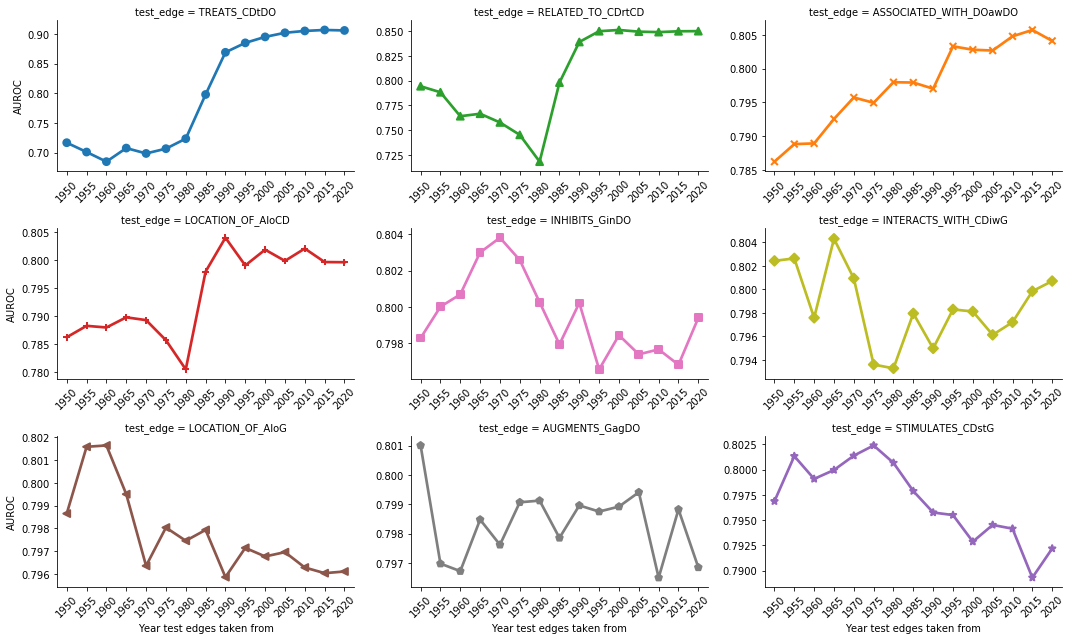

In [28]:
n_row = 3
n_col = 3


markers = ['o', 'x', '^', '+', '*', '<', 's', 'p', 'D', 'v'][:len(top_dropped)]

#to_plot = change['test_edge'].values[:(n_row*n_col)]
data = roc_result.query('test_edge in @top_dropped').sort_values('delta_auroc', ascending=False)

g = sns.FacetGrid(data, col="test_edge", col_wrap=3, sharex=False, sharey=False, hue='test_edge', 
                  hue_order=top_dropped, hue_kws={'markers': markers})

g.map(sns.pointplot, "test_year", "auroc",  ci=None)
g.fig.set_size_inches(5*n_row, 3*n_col)
g.set_xticklabels(rotation=45)
g.fig.set_tight_layout(True)
g.set_ylabels('AUROC')
g.set_xlabels('Year test edges taken from')
plt.savefig(os.path.join(paper_figs, '4B.svg'), bbox_inches='tight', pad_inches=0.1);

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


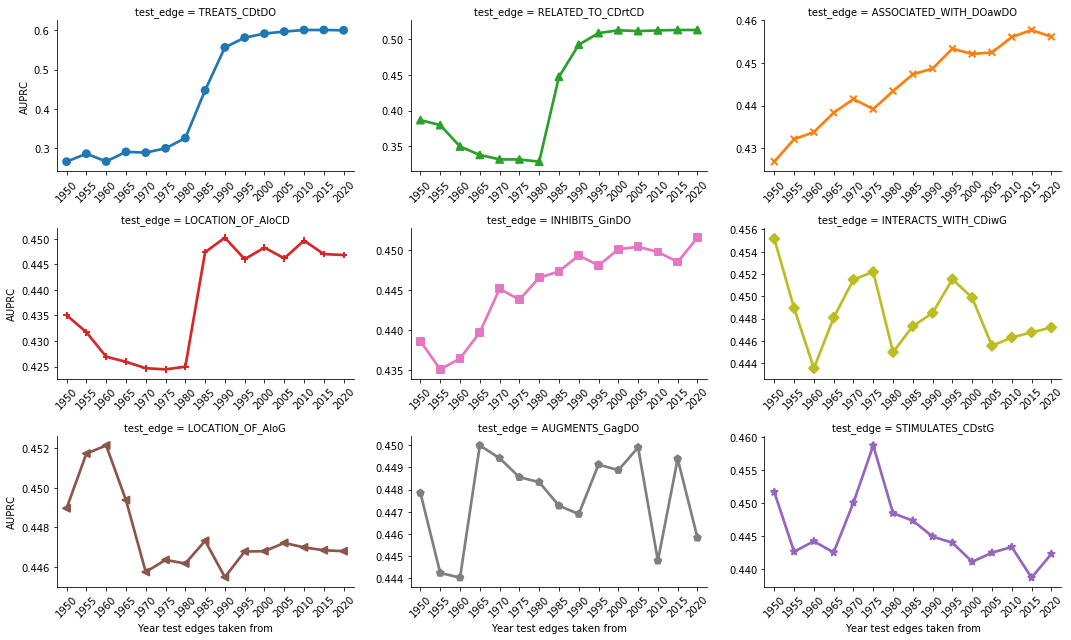

In [29]:
n_row = 3
n_col = 3


markers = ['o', 'x', '^', '+', '*', '<', 's', 'p', 'D', 'v'][:len(top_dropped)]

#to_plot = change['test_edge'].values[:(n_row*n_col)]
data = roc_result.query('test_edge in @top_dropped').sort_values('delta_auroc', ascending=False)

g = sns.FacetGrid(data, col="test_edge", col_wrap=3, sharex=False, sharey=False, hue='test_edge', 
                  hue_order=top_dropped, hue_kws={'markers': markers})

g.map(sns.pointplot, "test_year", "auprc",  ci=None)
g.fig.set_size_inches(5*n_row, 3*n_col)
g.set_xticklabels(rotation=45)
g.fig.set_tight_layout(True)
g.set_xlabels('Year test edges taken from')
g.set_ylabels('AUPRC');
#plt.savefig(os.path.join(paper_figs, '4B.svg'), bbox_inches='tight', pad_inches=0.1);

## A couple specific examples

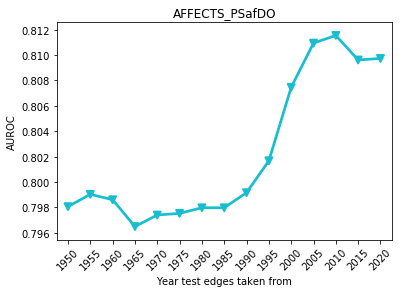

In [30]:
test_edge = "AFFECTS_PSafDO"

sns.pointplot(x='test_year', y='auroc', data=roc_result.query('test_edge == @test_edge'), color=sns.color_palette()[-1], markers=['v'])
plt.title(test_edge)
plt.xlabel('Year test edges taken from')
plt.ylabel('AUROC')
plt.xticks(rotation=45)
plt.savefig(os.path.join(supp_figs, 'S3.svg'));

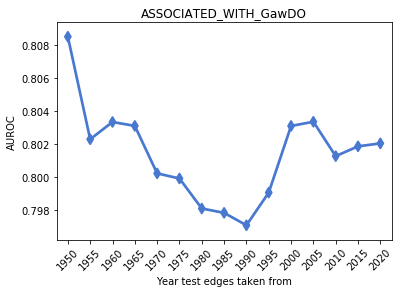

In [31]:
test_edge = "ASSOCIATED_WITH_GawDO"
color=sns.color_palette('muted')[0]

sns.pointplot(x='test_year', y='auroc', data=roc_result.query('test_edge == @test_edge'), color=color, markers=['d'])
plt.title(test_edge)
plt.xlabel('Year test edges taken from')
plt.ylabel('AUROC')
plt.xticks(rotation=45)
plt.savefig(os.path.join(supp_figs, 'S4.svg'));

## Just plot the overall changes from 1950-1985, 1985-2020, and 1950-2020

In [32]:
change_melt = change.melt(id_vars=['test_edge'], value_vars=['delta_auroc', 'delta_auprc', 'increase_from_1985', 'decrease_from_1985'])

In [33]:
change_melt.head(2)

,test_edge,variable,value
0,TREATS_CDtDO,delta_auroc,0.188912
1,RELATED_TO_CDrtCD,delta_auroc,0.055561


In [34]:
change_melt.query('test_edge == @test_edge')

,test_edge,variable,value
26,ASSOCIATED_WITH_GawDO,delta_auroc,-0.006441
56,ASSOCIATED_WITH_GawDO,delta_auprc,0.017261
86,ASSOCIATED_WITH_GawDO,increase_from_1985,0.004196
116,ASSOCIATED_WITH_GawDO,decrease_from_1985,-0.010636


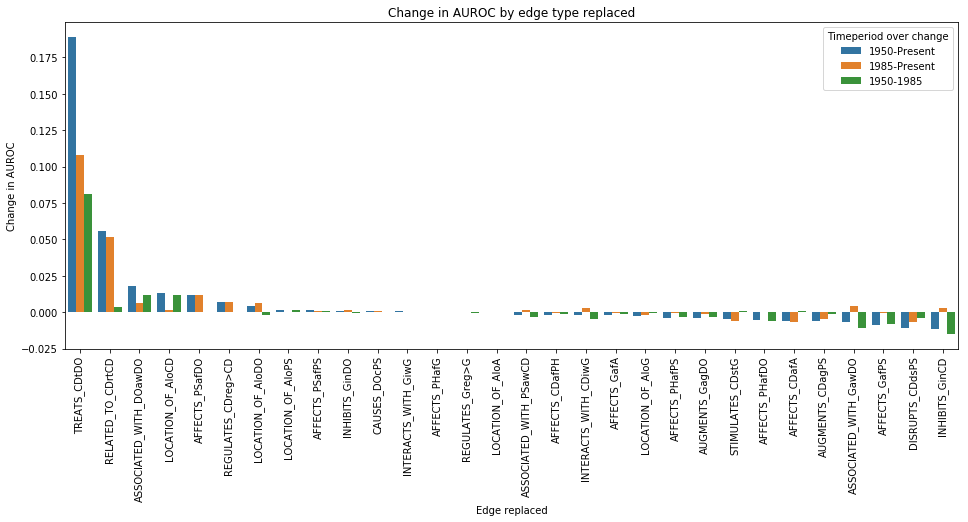

In [35]:
fig = plt.figure()

fig.set_size_inches(16, 6)

sns.barplot(x='test_edge', y='value', hue='variable', data=change_melt.query('variable in ["delta_auroc", "increase_from_1985", "decrease_from_1985"]'))

plt.title('Change in AUROC by edge type replaced')
plt.xlabel('Edge replaced')
plt.ylabel('Change in AUROC')

l = plt.legend(title='Timeperiod over change')

text_map = {'delta_auroc': '1950-Present', 'increase_from_1985': '1985-Present', 'decrease_from_1985': '1950-1985'}

for t in l.get_texts():
    text = t.get_text()
    t.set_text(text_map[text])

plt.xticks(rotation=90); 